# Ch.2 Exercises

The following exercises are from **Chapter 2: Accessing Text Corpora and Lexical Resources** of the book *Natural Language Processing with Python — Analyzing Text with the Natural Language Toolkit* by Steven Bird, Ewan Klein, and Edward Loper.

[[Read Now]](https://www.nltk.org/book/ch02.html)

In [1]:
import nltk

%matplotlib inline

**Exercise 1**

☼ Create a variable `phrase` containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [2]:
phrase = ['forever', 'and', 'always', 'and', 'eternity']

In [19]:
print(phrase + phrase)
print(phrase*3)
print(phrase[0][:3], phrase[2], phrase[3], phrase[4])
print(sorted(set(phrase)))

['forever', 'and', 'always', 'and', 'eternity', 'forever', 'and', 'always', 'and', 'eternity']
['forever', 'and', 'always', 'and', 'eternity', 'forever', 'and', 'always', 'and', 'eternity', 'forever', 'and', 'always', 'and', 'eternity']
for always and eternity
['always', 'and', 'eternity', 'forever']


**Exercise 2**

☼ Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

In [20]:
austen_persuasion = nltk.corpus.gutenberg.words('austen-persuasion.txt')

In [21]:
austen_persuasion[:10]

['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ']', 'Chapter', '1', 'Sir']

In [24]:
len(austen_persuasion) # word tokens, i.e. each individual sequence of characters

98171

In [26]:
len(sorted(set(austen_persuasion))) # distinct word types, i.e. the set of all unique tokens

6132

**Exercise 3**

☼ Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [30]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [31]:
sample_sci_fi = nltk.corpus.brown.words(categories="science_fiction")
sample_romance = nltk.corpus.brown.words(categories="romance")

for item in [sample_sci_fi, sample_romance]:
    print(item[:10])

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', 'self', 'he', 'was']
['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man', '.', 'To']


In [35]:
nltk.corpus.webtext.words("pirates.txt")[:20]

['PIRATES',
 'OF',
 'THE',
 'CARRIBEAN',
 ':',
 'DEAD',
 'MAN',
 "'",
 'S',
 'CHEST',
 ',',
 'by',
 'Ted',
 'Elliott',
 '&',
 'Terry',
 'Rossio',
 '[',
 'view',
 'looking']

**Exercise 4**

☼ Read in the texts of the *State of the Union* addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?

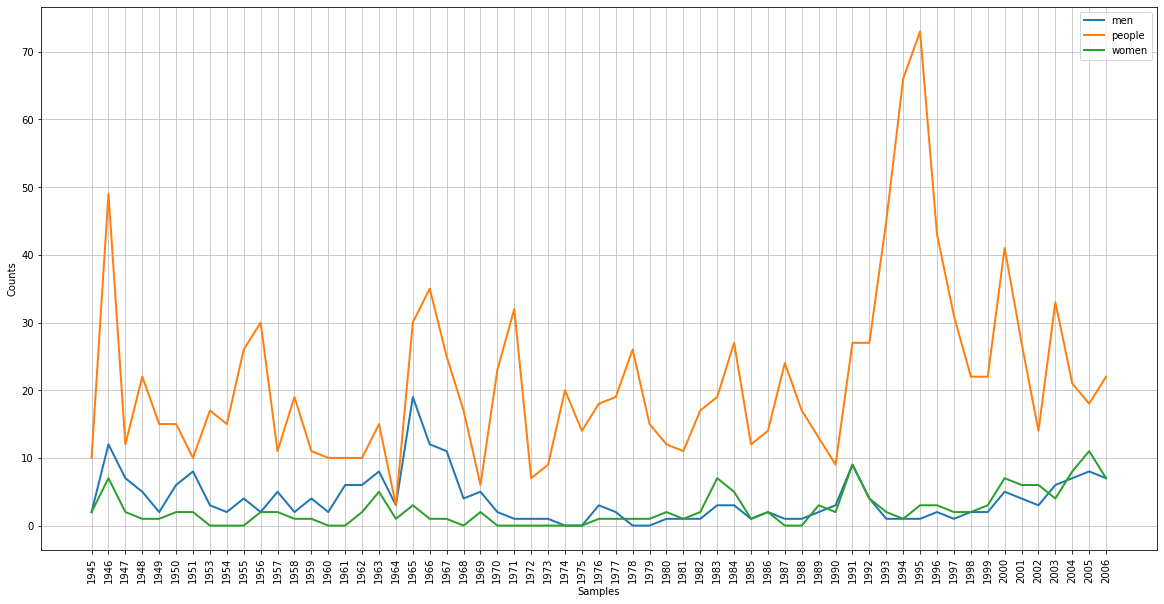

In [44]:
from nltk.corpus import state_union

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

state_union_cfd = nltk.ConditionalFreqDist(
                    (target, fileid[:4])
                    for fileid in state_union.fileids()
                    for word in state_union.words(fileid)
                    for target in ['men', 'women', 'people']
                    if word.lower() == target)

state_union_cfd.plot()

The word `people` has seen a considerable spike in 1946, around the time of World War II. It also saw a considerable increase between the years of 1991 and 1998, with a peak in 1994 and 1995. The word `men` had a small peak near World War II, but saw considerable use in 1965 and on until 1967, during the Civil Rights Movement. Finally, the term `women` has seen some increase over time, with an obvious upward trend beginning in the mid-1990s, perhaps in tandem with the Third-Wave Feminist Movement.

**Exercise 5**

☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.

In [2]:
from nltk.corpus import wordnet

In [5]:
wordnet.synsets('people')

[Synset('people.n.01'),
 Synset('citizenry.n.01'),
 Synset('people.n.03'),
 Synset('multitude.n.03'),
 Synset('people.v.01'),
 Synset('people.v.02')]

In [6]:
wordnet.synset('people.n.01').member_meronyms()

[Synset('person.n.01')]

In [7]:
wordnet.synset('people.n.01').part_meronyms()

[]

In [8]:
wordnet.synset('people.n.01').substance_meronyms()

[]

In [9]:
wordnet.synset('people.n.01').part_holonyms()

[]

In [10]:
wordnet.synset('people.n.01').member_holonyms()

[Synset('world.n.08')]

In [11]:
wordnet.synset('people.n.01').substance_holonyms()

[]

I'm having trouble grasping the concept of holonymy and meronymy. From my understanding, a meronym is a component of the current word (a sub-word), and a holonym is a container of the present word (its super-word).

After working through `people` as an example, I think I've got a better understanding of it. Now I should be able to think of examples that won't present an empty list.

In [12]:
wordnet.synset('people.n.01').member_meronyms()

[Synset('person.n.01')]

A *person* is a member of the larger group, *people*.

In [13]:
wordnet.synset('car.n.01').part_meronyms()

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

This one was easy. Any of the parts of a car are meronyms for the larger object they belong to.

In [16]:
wordnet.synset('ice.n.01').substance_meronyms()

[Synset('water.n.01')]

Cool! I thought something chemical would get me a good *substance meronym* example. Indeed, ice is made of the substance water.

In [18]:
wordnet.synset('handle.n.01').part_holonyms()

[Synset('aspergill.n.01'),
 Synset('baggage.n.01'),
 Synset('baseball_bat.n.01'),
 Synset('briefcase.n.01'),
 Synset('brush.n.02'),
 Synset('carpet_beater.n.01'),
 Synset('carrycot.n.01'),
 Synset('cheese_cutter.n.01'),
 Synset('coffee_cup.n.01'),
 Synset('coffeepot.n.01'),
 Synset('cricket_bat.n.01'),
 Synset('cutlery.n.02'),
 Synset('edge_tool.n.01'),
 Synset('faucet.n.01'),
 Synset('frying_pan.n.01'),
 Synset('hand_tool.n.01'),
 Synset('handbarrow.n.01'),
 Synset('handcart.n.01'),
 Synset('handlebar.n.01'),
 Synset('handset.n.01'),
 Synset('ladle.n.01'),
 Synset('mug.n.04'),
 Synset('racket.n.04'),
 Synset('saucepan.n.01'),
 Synset('spatula.n.01'),
 Synset('teacup.n.02'),
 Synset('umbrella.n.01'),
 Synset('watering_can.n.01')]

That got me a lot more results that I thought! I thought *handle* would return *door*, but it didn't. Instead, I got a lot of other objects of which *handle* is a part.

Let's see what the components of a door are:

In [19]:
wordnet.synset('door.n.01').part_meronyms()

[Synset('lock.n.01')]

Ah, interesting. This wordnet only has *locks* as being parts of doors.

In [21]:
wordnet.synset('water.n.01').substance_holonyms()

[Synset('body_of_water.n.01'),
 Synset('ice.n.01'),
 Synset('ice_crystal.n.01'),
 Synset('perspiration.n.01'),
 Synset('snowflake.n.01'),
 Synset('tear.n.01')]

Awesome! I wasn't expecting these words (I was hoping *rain* would be a substance holonym of *water*), but this is such an interesting way to learn about this concept.

In [26]:
wordnet.synset('earth.n.01').member_holonyms()

[Synset('solar_system.n.01')]

Yes! I saw *people* as a member of the holonym *world*, so I tried to think of an equivalent concept. EM was just looking through a book of the solar system, so I thought that *earth* might be a member of the holonym *planet*, but *solar system* makes much more sense!

**Exercise 6**

☼ In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

Well, one of the most obvious problems I ran into was that the translation didn't go the other way around. I couldn't pass English words to get the results in Spanish or German. One super easy way to fix this is to add the reverse language pair to the dictionary. However, one problem you'll hit is that you won't be able to specify which language you want to translate it to. The dictionary (as given in the defined function) will overwrite the previous entry when using `update()`. To combat this, you'd want at minimum a dictionary of dictionaries, with languages listed as sub-keys so that one could specify the target.

**Exercise 7**

☼ According to Strunk and White's *Elements of Style*, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the *LanguageLog* posting "Fossilized prejudices about 'however'" at  http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


I used the 9 texts available in `from nltk.book import *` and the code `[text].concordance('however')` to pull out instances of *however*, and took a closer look at those coming at the beginning of a sentence.

In [33]:
text1.concordance('however')

Displaying 25 of 95 matches:
gledy - piggledy whale statements , however authentic , in these extracts , for
lave ? Tell me that . Well , then , however the old sea - captains may order me
ea - captains may order me about -- however they may thump and punch me about ,
 needs be the sign of " The Trap ." However , I picked myself up and hearing a 
 the conclusion that such an idea , however wild , might not be altogether unwa
 most obstreperously . I observed , however , that one of them held somewhat al
ade on the sea . In a few minutes , however , he was missed by his shipmates , 
bag ' s mouth . This accomplished , however , he turned round -- when , good he
te man into a purplish yellow one . However , I had never been in the South Sea
tle in the matter of my bedfellow . However , a good laugh is a mighty good thi
ight of the water it had absorbed . However , hat and coat and overshoes were o
pulpit , it had not escaped me that however convenient for a ship , these joint
lf baptized

> However, I picked myself up and hearing a ...
> However, I had never been in the South Sea...
> However, a good laugh is a mighty good thi...
> However, hat and coat and overshoes were o...
> However, by dint of beating about a little...
> However, a warm savory steam from the kitc...
> However, it is always as well to have a lo...
> However, my thoughts were at length carrie...
> However contracted, that definition is the...

Indeed, it appears that Strunk and White's prescription of "correct" usage is starkly in contrast to the actual usage of the word. In actuality, *however* at the beginning of a sentence most often means "nevertheless." In only one instance of the above examples does it mean what Strunk and White say it should at sentence start. This goes to show the contrast between prescriptivist notions of language use and actual use by everyday speakers.

**Exercise 8**

◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

In [2]:
from nltk.corpus import names

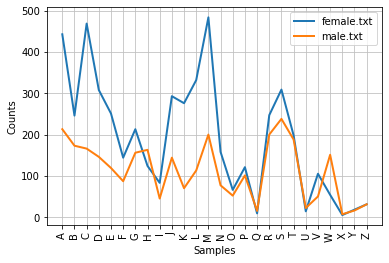

In [4]:
cfd = nltk.ConditionalFreqDist(
        (fileid, name[0])
        for fileid in names.fileids()
        for name in names.words(fileid))

cfd.plot()

**Exercise 9**

◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as *monstrous* in *Moby Dick* and in *Sense and Sensibility*?

In [52]:
# Sense and Sensibility vs. Monty Python and the Holy Grail
sense = text2
grail = text6

In [9]:
len(sense), len(grail)

(141576, 16967)

In [10]:
len(set(sense)), len(set(grail))

(6833, 2166)

In [11]:
len(set([w for w in sense if w.isalpha()])), len(set([w for w in grail if w.isalpha()]))

(6713, 2110)

I'll be comparing *Monty Python and the Holy Grail* vs. *Sense and Sensibility*. Based on simple word counts, it would appear that `python` is much more lexically diverse than `sense`; while *Sense* is nearly 8 times as long, it only uses 3 times as many unique words as Monty Python. Even so, Monty Python itself is still 3 times as unique as Sense overall, with a lexical diversity score of `100 * (2166/16967) = 12.765`, compared to a mere 4% for *Sense*

In [48]:
stopwords = nltk.corpus.stopwords.words('english')
sense_content = [w for w in sense if w.lower() not in stopwords and w.isalpha()]
grail_content = [w for w in grail if w.lower() not in stopwords and w.isalpha()]

In [46]:
sense_freq = FreqDist(sense_content)

sense_freq.most_common(10)

[('Elinor', 684),
 ('could', 568),
 ('Marianne', 566),
 ('Mrs', 530),
 ('would', 507),
 ('said', 397),
 ('every', 361),
 ('one', 304),
 ('much', 287),
 ('sister', 282)]

In [47]:
grail_freq = FreqDist(grail_content)

grail_freq.most_common(10)

[('ARTHUR', 225),
 ('Oh', 110),
 ('LAUNCELOT', 76),
 ('GALAHAD', 69),
 ('KNIGHT', 68),
 ('FATHER', 63),
 ('BEDEVERE', 61),
 ('Well', 54),
 ('HEAD', 54),
 ('GUARD', 53)]

I was able to find the 10 most common words in both texts after removing stopwords and non-alphabetic characters. It appears that both texts are consistent in mainly using pronouns to refer to the main characters. However, I think this is much more evident in the Holy Grail, as it is a screenplay and the character's names are a necessary part of the document.

In [49]:
# use the function given in nltk ch2 4.1 'wordlist corpora'
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [53]:
unusual_sense = unusual_words(sense)
unusual_grail = unusual_words(grail)

In [56]:
set(unusual_sense).intersection(unusual_grail)

{'accompanied',
 'affairs',
 'ages',
 'allowed',
 'answers',
 'appearing',
 'asking',
 'became',
 'beds',
 'bones',
 'bottoms',
 'boys',
 'bringing',
 'called',
 'carries',
 'changed',
 'characters',
 'charged',
 'cherries',
 'commands',
 'compared',
 'conclusions',
 'consulted',
 'died',
 'doors',
 'england',
 'entered',
 'eyes',
 'feet',
 'finds',
 'finest',
 'gained',
 'girls',
 'guests',
 'guided',
 'hang',
 'happens',
 'has',
 'having',
 'heads',
 'heard',
 'held',
 'hills',
 'jokes',
 'kicked',
 'knees',
 'knows',
 'largest',
 'lies',
 'limbs',
 'lives',
 'll',
 'looked',
 'looks',
 'makes',
 'minutes',
 'named',
 'names',
 'nearer',
 'ones',
 'parts',
 'passed',
 'persons',
 'pimples',
 'pitched',
 'ponds',
 'pounds',
 'praised',
 'questions',
 'reached',
 'relics',
 'remembered',
 'required',
 'rocks',
 'says',
 'scenes',
 'seemed',
 'seems',
 'shrubberies',
 'started',
 'strangers',
 'stretched',
 'strongest',
 'suffered',
 'supports',
 'things',
 'thirds',
 'tis',
 'traveller

*shrubberies* is a word that appears in both texts!! Oh boy, I can't wait to see what the context is...

In [57]:
sense.concordance("shrubberies")

Displaying 2 of 2 matches:
stealing away through the winding shrubberies , now just beginning to be in bea
 ;-- could chuse papers , project shrubberies , and invent a sweep . Mrs . Jenn


In [58]:
grail.concordance("shrubberies")

Displaying 6 of 6 matches:
 : Aggh ! No ! Never ! We have no shrubberies here . ARTHUR : If you do not tel
 ... ni ! CRONE : No ! Never ! No shrubberies ! ARTHUR : Ni ! CRONE : [ cough ]
Even those who arrange and design shrubberies are under considerable economic s
 history . ARTHUR : Did you say ' shrubberies '? ROGER : Yes . Shrubberies are 
ay ' shrubberies '? ROGER : Yes . Shrubberies are my trade . I am a shrubber . 
r . I arrange , design , and sell shrubberies . BEDEVERE : Ni ! ARTHUR : No ! N


In [75]:
sense.common_contexts(["charged", "delighted"])

am_with


In [76]:
grail.common_contexts(["charged", "imprisoned"])

been_by


I believed *charged* would be a good candidate for a word with differing meaning across these two texts. However, upon closer inspection, they appear to be more similar than differing. For instance, Sense returns *charged* as most similar to *delighted*, in the sense of "am charged with" and "am delighted with." In comparison, Holy Grail likens *charged* to *imprisoned* by way of "been charged by" and "been imprisoned by".

However, "am charged with" and "been charged by" are actually much more similar to one another than either is to its common context as provided by nltk. I believe this goes to show how linguistic parsing can be immensely difficult if one simply focuses on syntax and word counts. Pragmatics and a deeper understanding of word meaning are necessary to achieve useful results.

**Exercise 10**

◑ Read the BBC News article: *UK's Vicky Pollards 'left behind'* http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on *LanguageLog*, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

**Exercise 11**

◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

**Exercise 12**

◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

**Exercise 13**

◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

**Exercise 14**

◑ Define a function `supergloss(s)` that takes a synset `s` as its argument and returns a string consisting of the concatenation of the definition of `s`, and the definitions of all the hypernyms and hyponyms of `s`.

**Exercise 15**

◑ Write a program to find all words that occur at least three times in the Brown Corpus.

**Exercise 16**

◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](https://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (`nltk.corpus.brown.categories()`). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

**Exercise 17**

◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

**Exercise 18**

◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

**Exercise 19**

◑ Write a program to create a table of word frequencies by genre, like the one given in [1](https://www.nltk.org/book/ch02.html#sec-extracting-text-from-corpora) for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

**Exercise 20**

◑ Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

**Exercise 21**

◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

**Exercise 22**

◑ Define a function `hedge(text)` which processes a text and produces a new version with the word `'like'` between every third word.

**Exercise 23a**

★ Zipf's Law: Let *f(w)* be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. *f × r = k*, for some constant *k*). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

Write a function to process a large text and plot word frequency against word rank using `pylab.plot`. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?

**Exercise 23b**

★ Generate random text, e.g., using `random.choice("abcdefg ")`, taking care to include the space character. You will need to `import` random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

**Exercise 24a**

★ Modify the text generation program in [2.2](https://www.nltk.org/book/ch02.html#code-random-text) further, to do the following tasks:

Store the `n` most likely words in a list words then randomly choose a word from the list using `random.choice()`. (You will need to `import` random first.)

**Exercise 24b**

★ Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.

**Exercise 24c**

★ Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

**Exercise 25**

★ Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

**Exercise 26**

★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using `wn.all_synsets('n')`.

**Exercise 27**

★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun *dog* has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

**Exercise 28**

★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by [(Miller & Charles, 1998)](https://www.nltk.org/book/bibliography.html#millercharles1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.